In [ ]:
!sudo apt install python-pip
!pip install keras tensorflow-gpu

In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import os

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


# os.environ["CUDA_VISIBLE_DEVICES"]="0"
%matplotlib inline

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions

In [3]:
img_rows, img_cols = 28, 28

# loading data

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

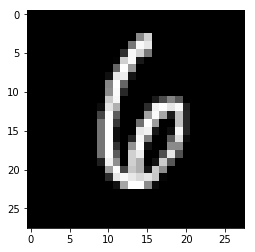

In [14]:
plt.imshow(x_train[np.random.choice(60000)],cmap='gray')

In [15]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# normalizing data

In [16]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# convert class vectors to categorical class matrices

In [17]:
y_train[1]

0

In [18]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [19]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Define a model

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

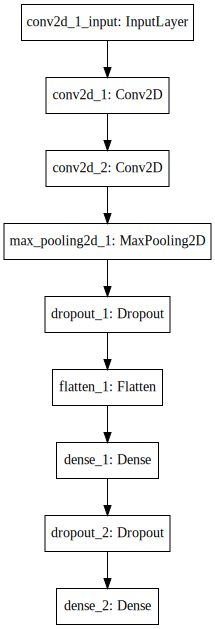

In [21]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
model.summary()

# compiling model

In [ ]:
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.0001, nesterov=False)

model.compile(loss=['categorical_crossentropy'],
              optimizer=sgd,
              metrics=['accuracy'])

# model training

In [ ]:
os.system('rm -rf Graph')
visualize = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1,  
          write_graph=True, write_images=True)
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[visualize])

# model testing

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
img = x_test[np.random.choice(10000)]
pred = model.predict(np.expand_dims(img,axis=0))
print('network output: \n {}\n'.format(pred))
print('prediction: {}'.format(np.argmax(pred,axis=1)))
print('\n'*3)
plt.imshow(img[:,:,0],cmap='gray')